In [1]:
import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path

# Set visualization style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Define the root path (Adjust this if the dataset folder name is slightly different after adding)
dataset_path = Path('/kaggle/input/spacenet-an-optimally-distributed-astronomy-data')

# Check if path exists and list top-level folders
if dataset_path.exists():
    print(f"Dataset found at: {dataset_path}")
    print("Top level contents:", os.listdir(dataset_path))
else:
    print("Dataset not found. Please ensure you have added the dataset to the notebook.")

# Helper function to get all image paths and labels
def get_image_data(root_path):
    image_paths = []
    labels = []
    
    # We assume the dataset follows the structure: root/class_name/image.jpg
    # Using rglob to find all standard image formats recursively
    for ext in ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tif']:
        for path in root_path.rglob(ext):
            image_paths.append(str(path))
            # Usually the parent folder name is the class label
            labels.append(path.parent.name)
            
    return pd.DataFrame({'path': image_paths, 'label': labels})

# Create the DataFrame
df = get_image_data(dataset_path)

# Display first few rows
print(f"Total images found: {len(df)}")
df.head()

Dataset found at: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data
Top level contents: ['SpaceNet.FLARE.imam_alam']
Total images found: 12824


,path,label
0,/kaggle/input/spacenet-an-optimally-distribute...,planet
1,/kaggle/input/spacenet-an-optimally-distribute...,planet
2,/kaggle/input/spacenet-an-optimally-distribute...,planet
3,/kaggle/input/spacenet-an-optimally-distribute...,planet
4,/kaggle/input/spacenet-an-optimally-distribute...,planet


Classes found and their counts:
           Class  Count
0         galaxy   3984
1           star   3269
2  constellation   1552
3         planet   1472
4         nebula   1192
5     black hole    656
6          comet    416
7       asteroid    283


/tmp/ipykernel_55/3600617722.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=class_counts, x='Class', y='Count', palette='viridis')


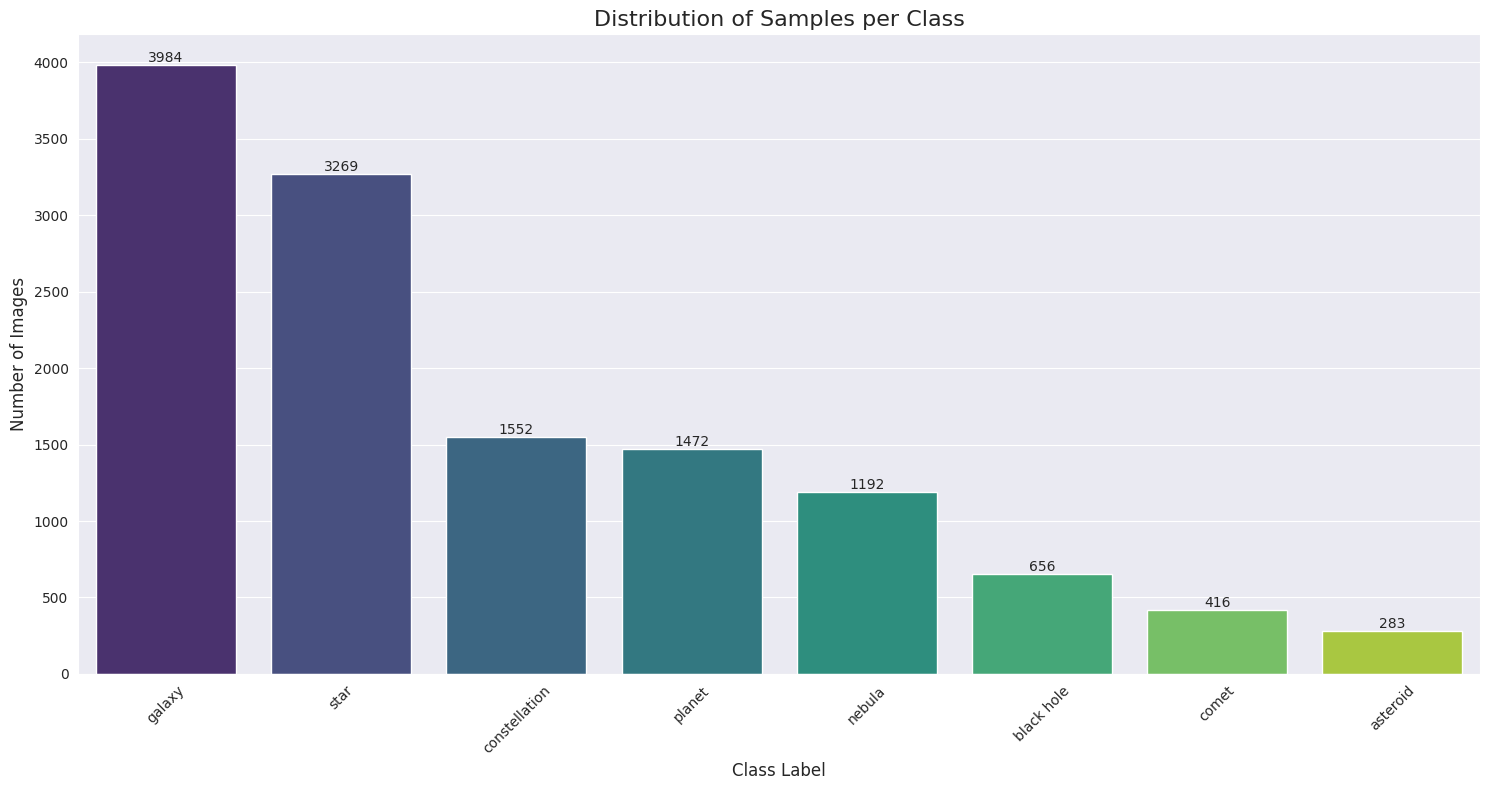

Most frequent class: 3984 samples
Least frequent class: 283 samples
Observation: The dataset appears to be Imbalanced.


In [6]:
#  Identify all classes and number of samples per class
class_counts = df['label'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

print("Classes found and their counts:")
print(class_counts)

# Plot the class distribution
plt.figure(figsize=(15, 8))
barplot = sns.barplot(data=class_counts, x='Class', y='Count', palette='viridis')
plt.title('Distribution of Samples per Class', fontsize=16)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)

# Add count labels on top of bars
for i, v in enumerate(class_counts['Count']):
    barplot.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Check for imbalance
min_count = class_counts['Count'].min()
max_count = class_counts['Count'].max()
print(f"Most frequent class: {max_count} samples")
print(f"Least frequent class: {min_count} samples")
if max_count / min_count > 1.5:
    print("Observation: The dataset appears to be Imbalanced.")
else:
    print("Observation: The dataset appears relatively Balanced.")

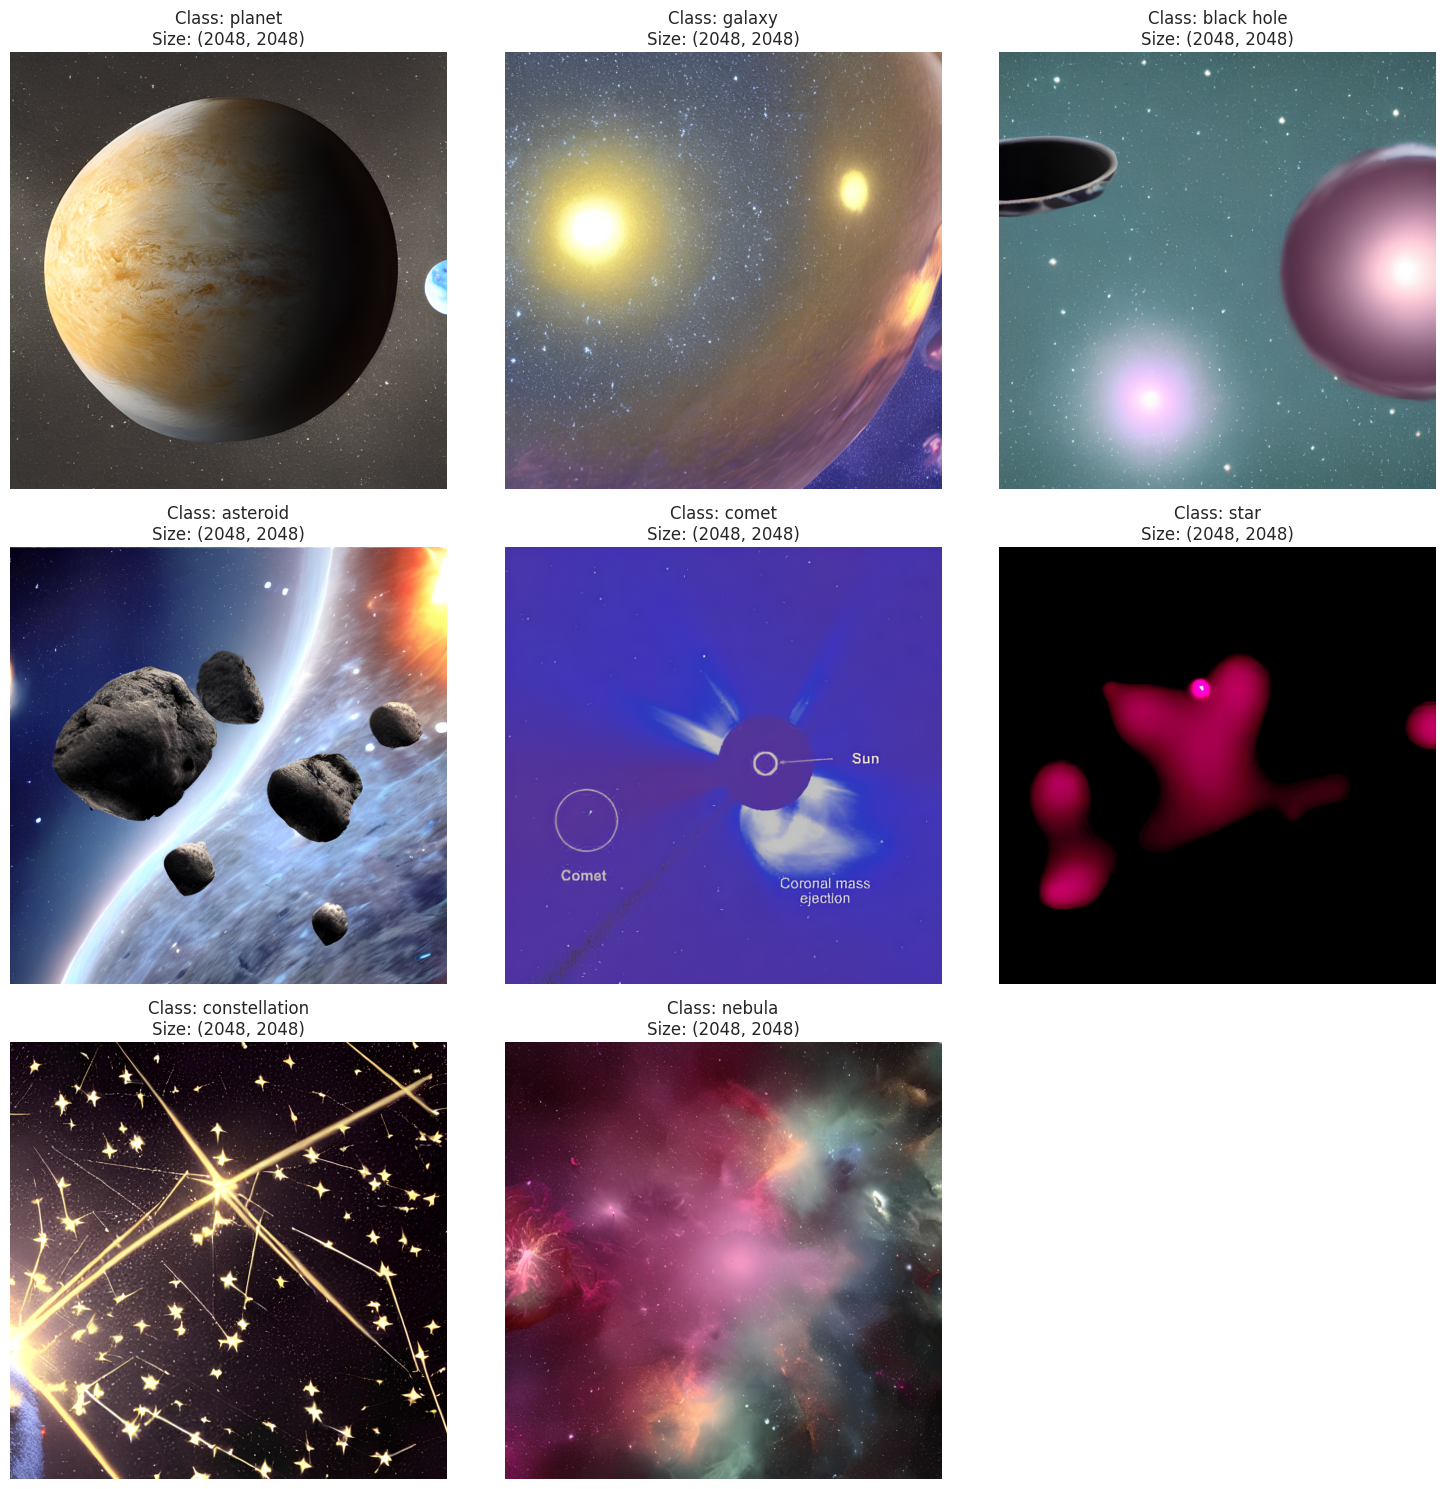

In [4]:
# Visualize random samples from each class
unique_classes = df['label'].unique()
num_classes = len(unique_classes)


cols = 3
rows = (num_classes + cols - 1) // cols

plt.figure(figsize=(15, 5 * rows))

for i, class_name in enumerate(unique_classes):
    # Get a random image path for this class
    sample_path = df[df['label'] == class_name].sample(1)['path'].values[0]
    
    # Open image
    img = Image.open(sample_path)
    
    # Plot
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"Class: {class_name}\nSize: {img.size}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Error reading /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_25_image_4_4_SwinIR_large.png: cannot identify image file '/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_25_image_4_4_SwinIR_large.png'
Error reading /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_3_image_13_2_SwinIR_large.png: cannot identify image file '/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_3_image_13_2_SwinIR_large.png'
Error reading /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_15_4_SwinIR_large.png: cannot identify image file '/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_15_4_SwinIR_large.png'
Error reading /kaggle/input/spacenet-an-optima

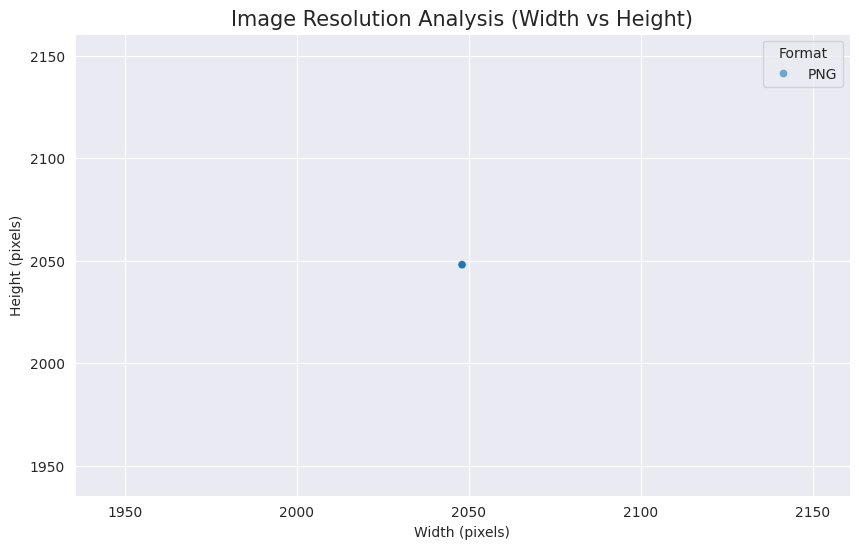

--- Image Resolution Summary ---
        Width  Height
count  1778.0  1778.0
mean   2048.0  2048.0
std       0.0     0.0
min    2048.0  2048.0
25%    2048.0  2048.0
50%    2048.0  2048.0
75%    2048.0  2048.0
max    2048.0  2048.0

--- Image Formats ---
Format
PNG    1778
Name: count, dtype: int64

--- Image Modes (Color Channels) ---
Mode
RGB    1778
Name: count, dtype: int64


In [5]:
#  Analyze image resolutions and formats

# We will sample the data to save time if the dataset is huge (e.g., analyze first 1000 images)
# If dataset is small (<10k), you can run on all of them.
sample_df = df.sample(min(len(df), 2000)) 

widths = []
heights = []
formats = []
modes = [] # e.g. RGB, Grayscale

for img_path in sample_df['path']:
    try:
        with Image.open(img_path) as img:
            widths.append(img.size[0])
            heights.append(img.size[1])
            formats.append(img.format)
            modes.append(img.mode)
    except Exception as e:
        print(f"Error reading {img_path}: {e}")

# Create analysis dataframe
res_df = pd.DataFrame({
    'Width': widths,
    'Height': heights,
    'Format': formats,
    'Mode': modes
})

# Plot Resolution Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(data=res_df, x='Width', y='Height', hue='Format', alpha=0.6)
plt.title('Image Resolution Analysis (Width vs Height)', fontsize=15)
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.show()

# Print summary
print("--- Image Resolution Summary ---")
print(res_df.describe())
print("\n--- Image Formats ---")
print(res_df['Format'].value_counts())
print("\n--- Image Modes (Color Channels) ---")
print(res_df['Mode'].value_counts())